In [4]:
!conda install pytorch torchvision cudatoolkit=11.3 -c pytorch -y

In [1]:
# cloning yolov5

!git clone https://github.com/ultralytics/yolov5  
%cd yolov5
%pip install -qr requirements.txt

In [20]:
%cd yolov5
import torch
from yolov5 import utils
import torch
import utils
from IPython import display
from IPython.display import clear_output
from pathlib import Path
import yaml
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob


%matplotlib inline
display = utils.notebook_init()

YOLOv5 🚀 v7.0-192-g459dd49 Python-3.10.9 torch-2.0.1 CPU


Setup complete ✅ (12 CPUs, 31.2 GB RAM, 243.7/456.9 GB disk)


In [24]:
!cat data/cattle_belly_data.yaml
print ('---------------------------------------------')


train: ../datasets/cattle_belly/images/train
val: ../datasets/cattle_belly/images/valid
test: ../datasets/cattle_belly/images/test

nc: 1
names:
  0: belly
---------------------------------------------


In [28]:
!python ../datasets/cattle_belly/labels/masks_to_polygons_train.py
!python ../datasets/cattle_belly/labels/masks_to_polygons_valid.py

In [29]:
!python ../datasets/cattle_belly/labels/rename_labels_files.py

167
111
140
52
213
160
143
238
42
184
118
repeated file with id: 111
joining labels into the file: ../datasets/cattle_belly/labels/train/frame_12500_original.txt
-----/----/----/....done!
215
209
174
130
repeated file with id: 174
joining labels into the file: ../datasets/cattle_belly/labels/train/frame_480_original.txt
-----/----/----/....done!
116
repeated file with id: 215
joining labels into the file: ../datasets/cattle_belly/labels/train/frame_9460_original.txt
-----/----/----/....done!
170
177
repeated file with id: 213
joining labels into the file: ../datasets/cattle_belly/labels/train/frame_9540_original.txt
-----/----/----/....done!
repeated file with id: 174
joining labels into the file: ../datasets/cattle_belly/labels/train/frame_480_original.txt
-----/----/----/....done!
198
repeated file with id: 238
joining labels into the file: ../datasets/cattle_belly/labels/train/frame_400_original.txt
-----/----/----/....done!
106
141
50
173
236
214
201
repeated file with id: 130
join

In [30]:
!python segment/train.py --batch 25 --epochs 250 --data 'data/cattle_belly_data.yaml' --weights 'yolov5s-seg.pt' --project 'runs_cattle_belly' --name 'feature_extraction' --cache --freeze 12
# clear_output()

segment/train: weights=yolov5s-seg.pt, cfg=, data=data/cattle_belly_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=250, batch_size=25, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs_cattle_belly, name=feature_extraction, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[12], save_period=-1, seed=0, local_rank=-1, mask_ratio=4, no_overlap=False
github: ⚠️ YOLOv5 is out of date by 18 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
[Errno 2] No such file or directory: '/home/lponce/anaconda3/envs/yolov5/lib/python3.10/site-packages/numpy-1.25.0.dist-info/METADATA'
YOLOv5 🚀 v7.0-192-g459dd49 Python-3.10.9 torch-2.0.1 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epoch

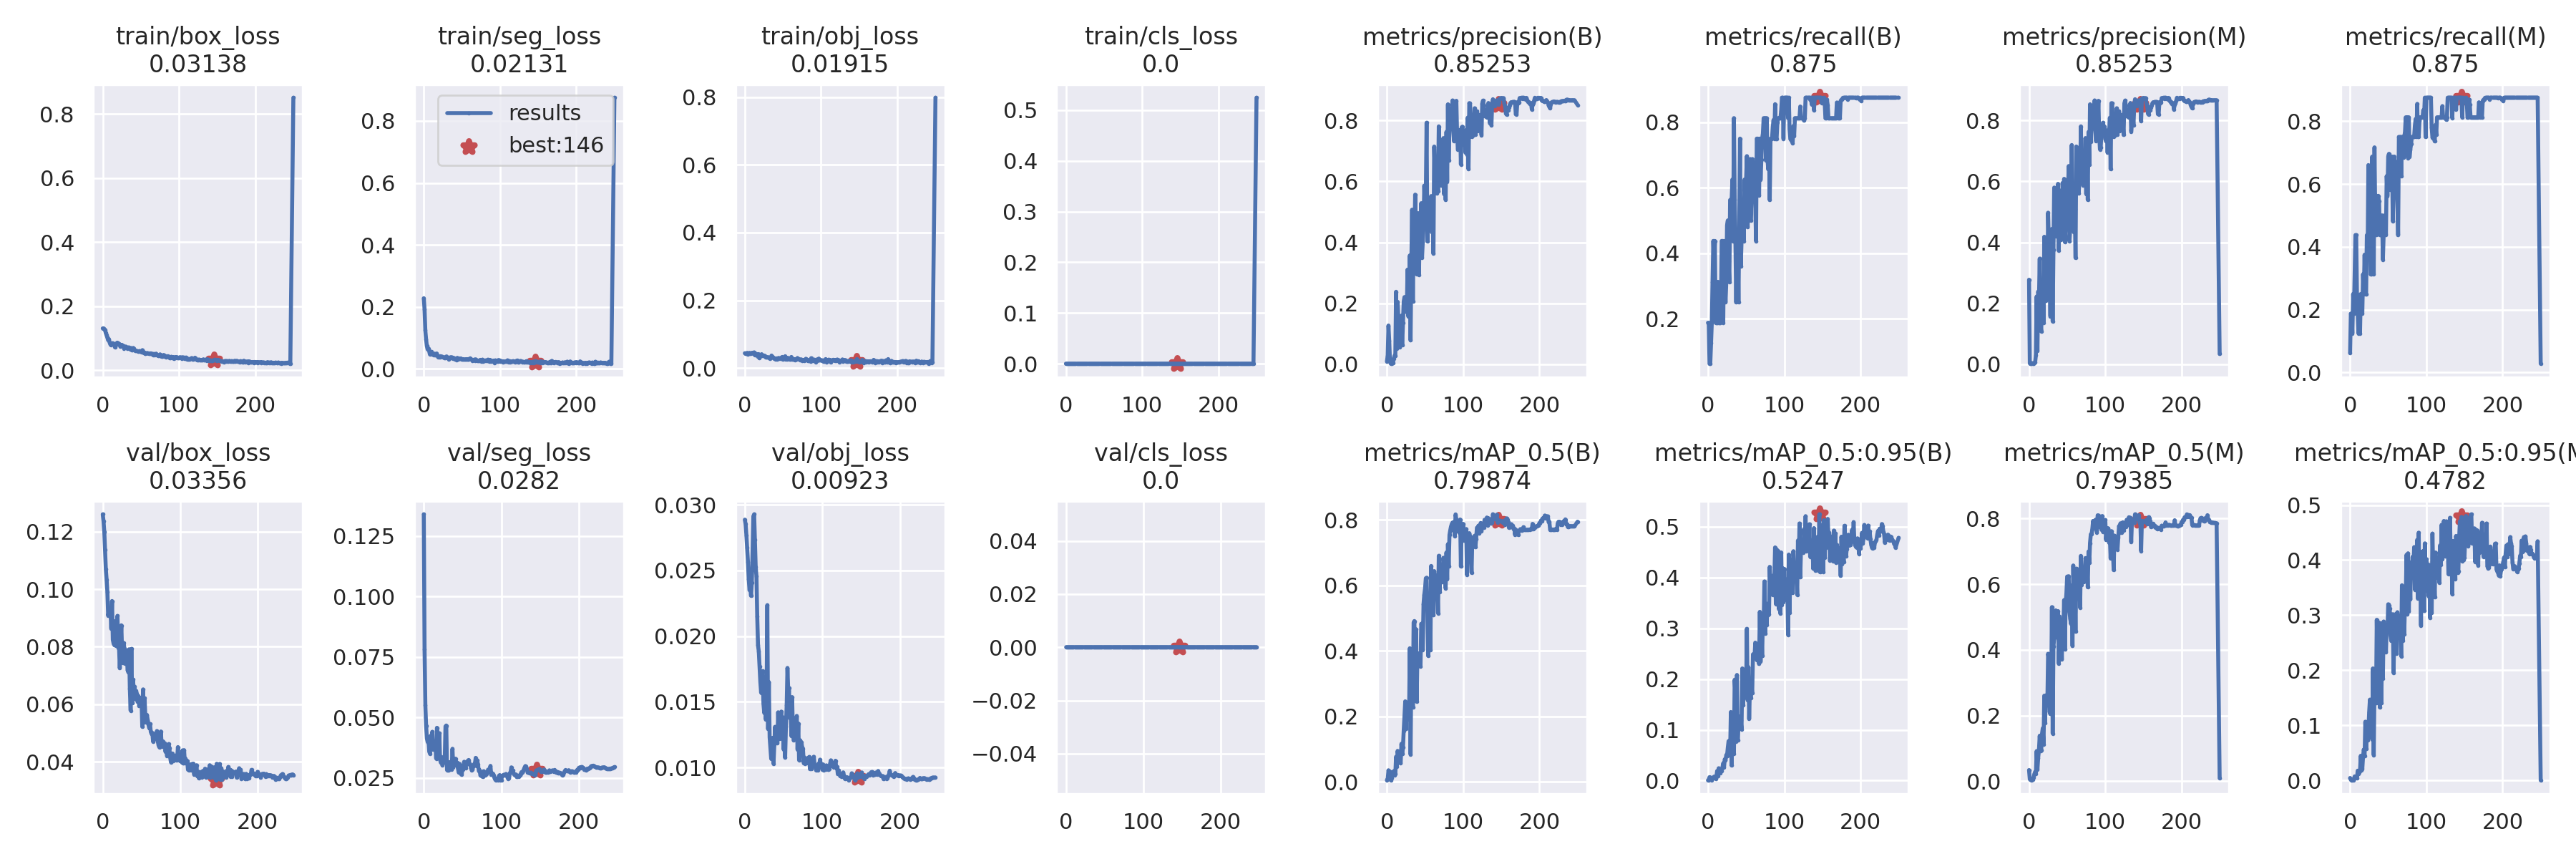

In [31]:
display.Image(f"runs_cattle_belly/feature_extraction/results.png")

In [32]:
!python segment/val.py --weights 'runs_cattle_belly/feature_extraction/weights/best.pt' --data 'data/cattle_belly_data.yaml' --project 'runs_cattle_belly'

segment/val: data=data/cattle_belly_data.yaml, weights=['runs_cattle_belly/feature_extraction/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs_cattle_belly, name=exp, exist_ok=False, half=False, dnn=False
[Errno 2] No such file or directory: '/home/lponce/anaconda3/envs/yolov5/lib/python3.10/site-packages/numpy-1.25.0.dist-info/METADATA'
YOLOv5 🚀 v7.0-192-g459dd49 Python-3.10.9 torch-2.0.1 CPU

Fusing layers... 
Model summary: 165 layers, 7398422 parameters, 0 gradients, 25.7 GFLOPs
val: Scanning /home/lponce/Documents/WORK/HerdWhistle/image_processing/yolov5/da
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         14         16      0.853      0.875      0.799      0.525      0.853      0.875      0.794      0.493
Speed: 1.5ms pr

In [37]:
!python segment/predict.py --weights 'runs_cattle_belly/feature_extraction/weights/best.pt'  --conf 0.5 --source '../datasets/cattle_belly/images/test' --project 'runs_cattle_belly' --name 'detect_test' --img-size 200

segment/predict: weights=['runs_cattle_belly/feature_extraction/weights/best.pt'], source=../datasets/cattle_belly/images/test, data=data/coco128.yaml, imgsz=[200, 200], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs_cattle_belly, name=detect_test, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
[Errno 2] No such file or directory: '/home/lponce/anaconda3/envs/yolov5/lib/python3.10/site-packages/numpy-1.25.0.dist-info/METADATA'
YOLOv5 🚀 v7.0-192-g459dd49 Python-3.10.9 torch-2.0.1 CPU

Fusing layers... 
Model summary: 165 layers, 7398422 parameters, 0 gradients, 25.7 GFLOPs
WARNING ⚠️ --img-size [200, 200] must be multiple of max stride 32, updating to [224, 224]
image 1/17 /home/lponce/Documents/WORK/HerdWhistle/image_processing/yo

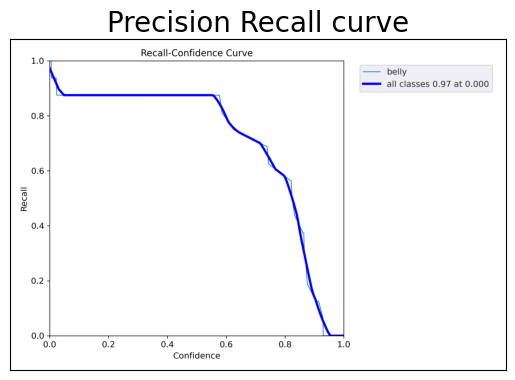

In [38]:
plt.plot(figsize=(20,20))
plt.title('Precision Recall curve', fontsize=20)
plt.tick_params(left = False, right = False , labelleft = False, labelbottom = False, bottom = False)
plt.imshow(mpimg.imread('runs_cattle_belly/feature_extraction/BoxR_curve.png'))

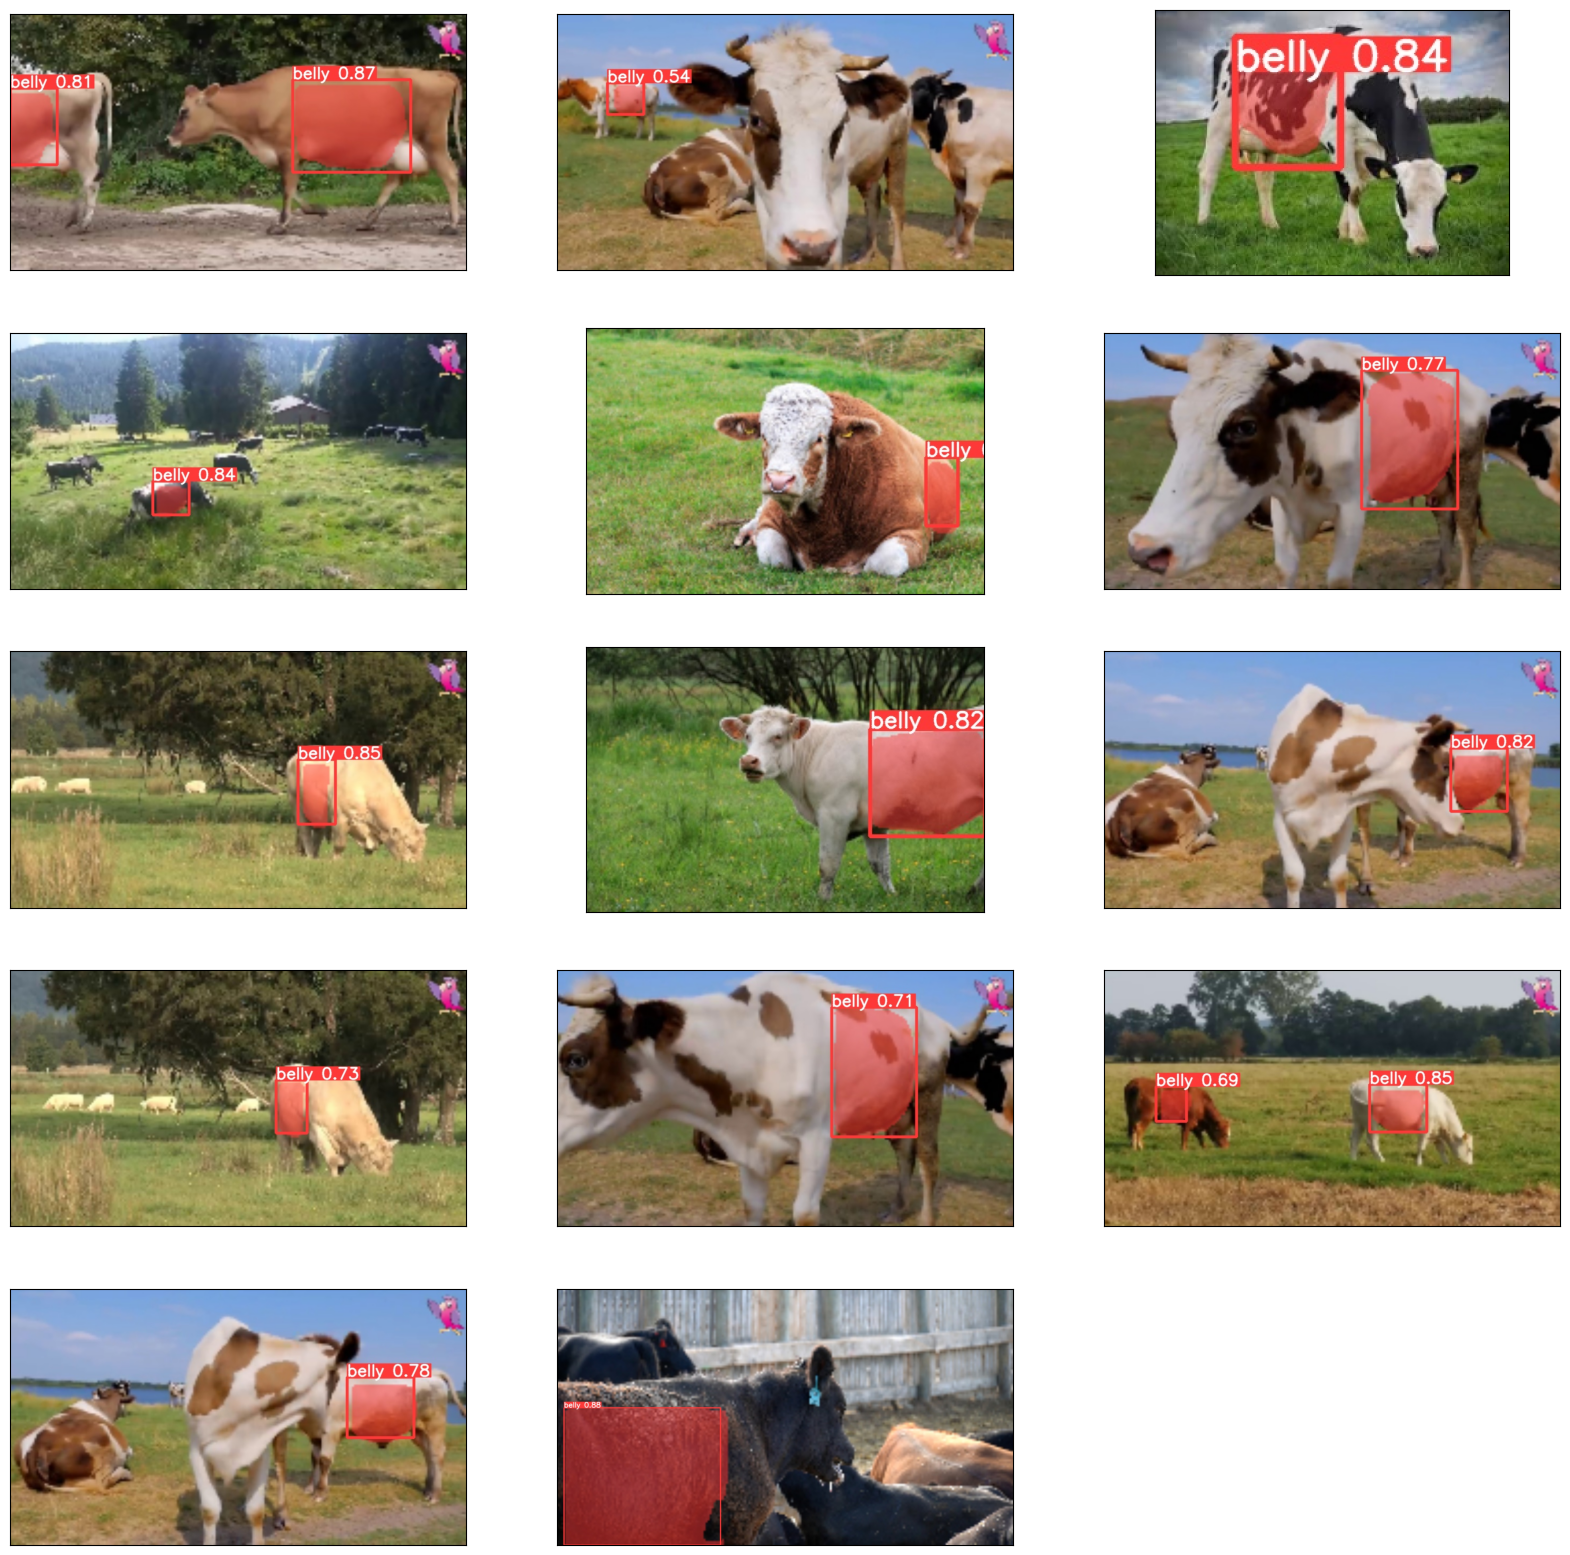

In [42]:
detect_path = r'runs_cattle_belly/detect_test'

images = []
for img_path in glob.glob(detect_path + '/*.jpg'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,20))
columns = 3
for i, image in enumerate(images):
    plt.subplot((int(len(images) / columns + 1)), columns, i + 1)
    plt.tick_params(left = False, right = False , labelleft = False, labelbottom = False, bottom = False)
    plt.imshow(image)
plt.show()